# Sentiment and Topic Analysis

##1 Business Understanding & Research

##2 Data Understanding

Data Collection and Exploratory Data Analysis (EDA)


In [ ]:
# IMPORT FILES FROM DRIVE INTO GOOGLE-COLAB:

# STEP-1: Import Libraries

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials     

In [ ]:
# STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1vvmTuYFC-uA7TEYU2TURvMbjdediSkl-'}) # replace the id with id of file you want to access
downloaded.GetContentFile('1429_1.csv') 

downloaded2 = drive.CreateFile({'id':'1UEWVgQLsI_w2FxxwhmK_cn-ufvuCOy3s'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv') 

downloaded3 = drive.CreateFile({'id':'1Gixe_4YXgmOJQ9YU1gpD2uHWkroYRSPL'}) # replace the id with id of file you want to access
downloaded3.GetContentFile('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv') 


#STEP-4: Read File

#3.1 Read file as panda dataframe
#import pandas as pd
#xyz = pd.read_csv('resources.csv') 
#print(xyz.head(1))

#Repeat STEPs 3 & 4 to load as many files as you require.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline

In [ ]:
from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

In [ ]:
import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

In [ ]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping

In [ ]:
review_data1 = pd.read_csv('1429_1.csv')
review_data1.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
review_data1.shape

(34660, 21)

In [ ]:
review_data1.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [ ]:
review_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
review_data1.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [ ]:
data0 = review_data1[['reviews.rating' , 'reviews.text']]
data0=data0.dropna()
data0.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [ ]:
data0.shape

(34626, 2)

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34626 non-null  float64
 1   reviews.text    34626 non-null  object 
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


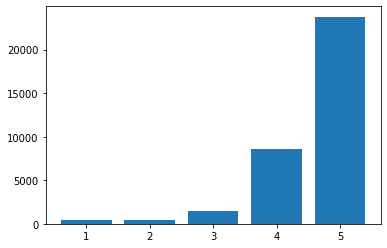

In [ ]:
counts = data0['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

**Solving Class Imbalance Problem**

Due to the imbalance of our dataset, we try to add in more data to reduce overfitting.

We add files such that we include rows with reviews lesser than 4 inorder to balance the dataset.

In [ ]:
review_data2 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
review_data2.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
review_data3 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
review_data3.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,NaN,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [ ]:
review_data2 = review_data2[['reviews.rating' , 'reviews.text']]
review_data2 = review_data2[review_data2["reviews.rating"]<=3]

review_data3 = review_data3[['reviews.rating' , 'reviews.text']]
review_data3 = review_data3[review_data3["reviews.rating"]<=3]

frames = [data0, review_data2, review_data3]
data1 = pd.concat(frames)
data1 = data1.dropna()

data1.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [ ]:
data0['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [ ]:
review_data2['reviews.rating'].value_counts()

3    1206
1     965
2     616
Name: reviews.rating, dtype: int64

In [ ]:
review_data3['reviews.rating'].value_counts()

3    197
1     63
2     54
Name: reviews.rating, dtype: int64

In [ ]:
data1['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     2902
1.0     1438
2.0     1072
Name: reviews.rating, dtype: int64

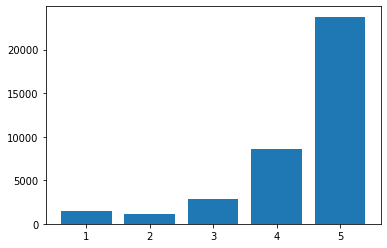

In [ ]:
counts = data1['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

Still this problem not solved.


**We have 3 classifications.**
   
   Negative (0) for star rating 1 and 2. <br>
   Neutral (1) for star rating 3. <br>
   Positive (2) for star rating 4 and 5.



In [ ]:
sentiment = {1: "Negative",
            2: "Negative",
            3: "Neutral",
            4: "Positive",
            5: "Positive"}

data1["sentiment"] = data1["reviews.rating"].map(sentiment)

data1.head(3)

,reviews.rating,reviews.text,sentiment
0,5.0,This product so far has not disappointed. My c...,Positive
1,5.0,great for beginner or experienced person. Boug...,Positive
2,5.0,Inexpensive tablet for him to use and learn on...,Positive


In [ ]:
data1 = data1[['reviews.text', 'sentiment']]

In [ ]:
data1.shape

(37727, 2)

In [ ]:
#print(data[data["sentiment"].isnull()])

In [ ]:
#df["sentiment"] = pd.to_numeric(df["sentiment"], errors='coerce')                                    
#df = df.dropna(subset=["sentiment"])
#df["sentiment"]  = df["sentiment"] .astype(int)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


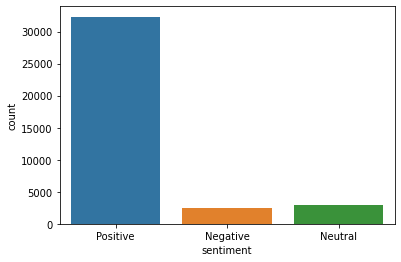

In [ ]:
sns.countplot( data1['sentiment'])

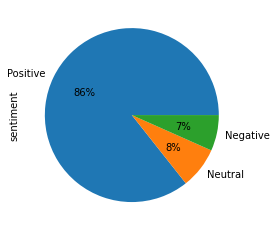

In [ ]:
data1['sentiment'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                 
mpl.rcParams['savefig.dpi']=100              
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    

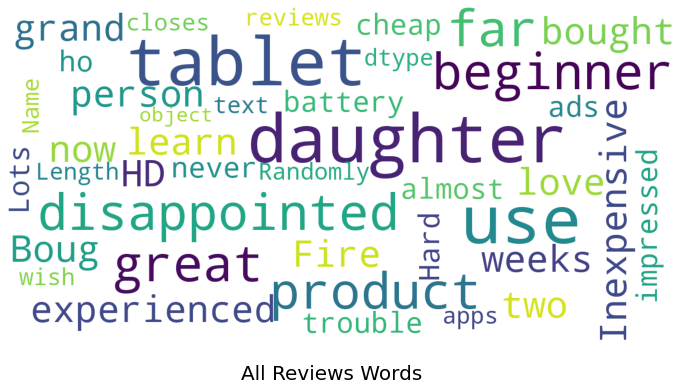

In [ ]:
show_wordcloud(data1['reviews.text'], title="All Reviews Words")

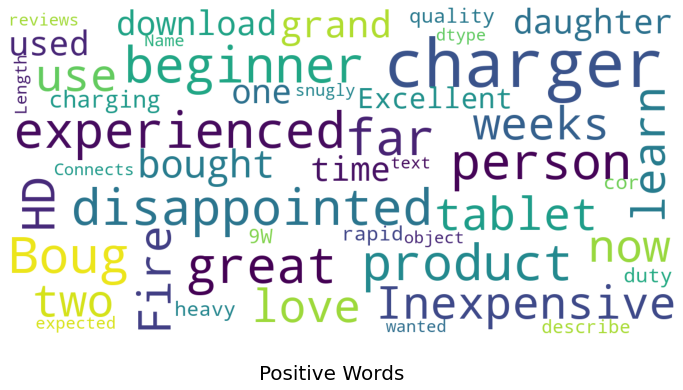

In [ ]:
show_wordcloud(data1['reviews.text'][data1.sentiment == "Positive"], title="Positive Words")

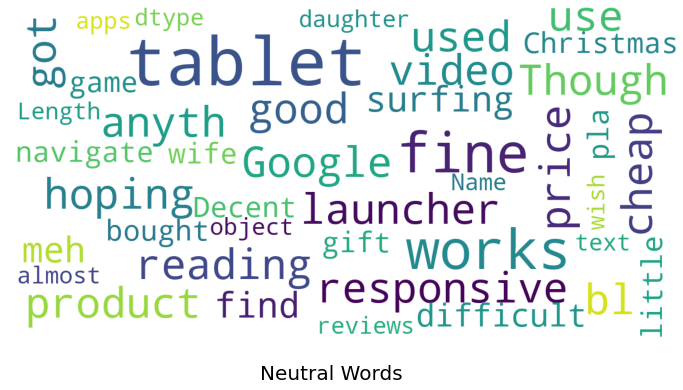

In [ ]:
show_wordcloud(data1['reviews.text'][data1.sentiment == "Neutral"], title="Neutral Words")

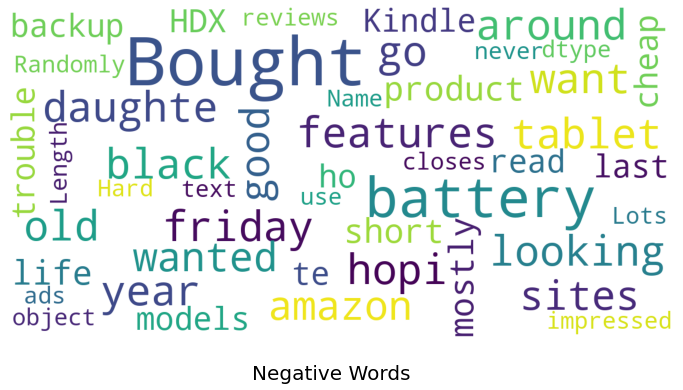

In [ ]:
show_wordcloud(data1['reviews.text'][data1.sentiment == "Negative"], title="Negative Words")

##3 Data Preparation

Data Preparation/Pre-processing

In [ ]:
from sklearn.model_selection import train_test_split

Solving Class Imbalance Problem

In [ ]:
data2 = data1

In [ ]:
data2.columns

Index(['reviews.text', 'sentiment'], dtype='object')

In [ ]:
data2.shape

(37727, 2)

Tackling Class Imbalance Problem:

In [ ]:
#Creating independent and Dependent Features
columns = data2.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["sentiment"]]
# Store the variable we are predicting 
target = "sentiment"
# Defining a random state 
state = np.random.RandomState(42)
X = data2[columns]
Y = data2[target]
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(37727, 1)
(37727,)


Applying Over Sampling

In [ ]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0) 
X_res,Y_res=ros.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print(sorted(Counter(Y_res).items()))

[('Negative', 32315), ('Neutral', 32315), ('Positive', 32315)]


In [ ]:
X_res.shape,Y_res.shape

((96945, 1), (96945,))

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({'Positive': 32315, 'Neutral': 2902, 'Negative': 2510})
Resampled dataset shape Counter({'Positive': 32315, 'Negative': 32315, 'Neutral': 32315})


In [ ]:
#Creating X output to dataframe
X1=pd.DataFrame(X_res,columns=['Processed_Review'])

In [ ]:
#Creating Y output to dataframe for merging
Y1=pd.DataFrame(Y_res,columns=['sentiment'])

In [ ]:
#Merging the X & Y output to Final data
Final_data=pd.concat([X1,Y1],axis=1)
Final_data.head()

,Processed_Review,sentiment
0,This product so far has not disappointed. My c...,Positive
1,great for beginner or experienced person. Boug...,Positive
2,Inexpensive tablet for him to use and learn on...,Positive
3,I've had my Fire HD 8 two weeks now and I love...,Positive
4,I bought this for my grand daughter when she c...,Positive


In [ ]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96945 entries, 0 to 96944
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Processed_Review  96945 non-null  object
 1   sentiment         96945 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


Neutral     32315
Positive    32315
Negative    32315
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Distribution of Reviews Sentiment')

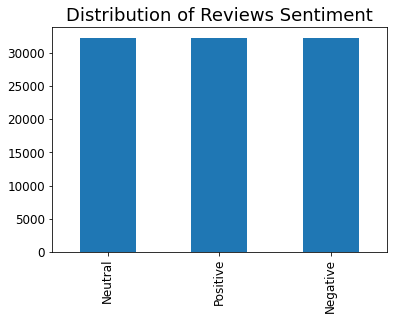

In [ ]:
# Using Matplotlib to plot the final data & show distribution of reviews sentiment in the dataset
print(Final_data.sentiment.value_counts())
Final_data['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of Reviews Sentiment", size=18)

In [ ]:
df = Final_data.sample(frac=0.1, random_state=0) 

# Dropping missing values
df.dropna(inplace=True)

df.head()

,Processed_Review,sentiment
51210,Had it for about a week and now it won't take ...,Negative
71862,I did not use this product I gave it as a pres...,Neutral
80645,I purchased this product during a recent sale....,Neutral
82090,Very limited in capabilities. I am used to usi...,Neutral
33963,I originally had a firestick and it worked oka...,Positive


**Train & Test Split Data**

In [ ]:
# Splitting data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Review'], df['sentiment'], \
                                                    test_size=0.10, random_state=10)

In [ ]:
print('Total %d training counts and %d validation counts. \n' %(X_train.shape[0],X_test.shape[0]))
print('A review in the training set : \n', X_train.iloc[10])

Total 8724 training counts and 970 validation counts. 

A review in the training set : 
 This is a good tablet for children and adults too. However there is an issue with the port and charger cable. We did not even have this tablet 3 weeks before it would barley charge. Took it back to best buy and they said they could not fox it, and imagine the port is not covered under the manufacturer warranty. So now I have a tablet that takes a couple days to charge. Its really frustrating.


***Bag of Words***

*   The aim is to classify the reviews into positive, neutral and negative sentiment. 


*   One common approach of word embedding is frequency based embedding viz Bag of Words (BoW) model. BoW model learns a vocabulary list from a given corpus and represents each document based on some counting methods of words. Here, we will explore the model performance using BoW with supervised learning algorithms. 

***Text Preprocessing***

The following text preprocessing methods are implemented to convert raw reviews to cleaned review making it easier to do feature extraction in the next step.

1.   Remove non-character such as digits and symbols.
2.   Convert to lower case.
3.   Remove stop words such as "the" and "and" if needed.
4.   Convert to root words by stemming if needed.

##4 Modeling & Evaluation

In [ ]:
from nltk.corpus import stopwords
nltk.download('wordnet')
#Download Stopwords
nltk.download('stopwords')

def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword        
        stops = set(stopwords.words('english'))
        
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 this is a good tablet for children and adults too however there is an issue with the port and charger cable we did not even have this tablet weeks before it would barley charge took it back to best buy and they said they could not fox it and imagine the port is not covered under the manufacturer warranty so now i have a tablet that takes a couple days to charge its really frustrating


In [ ]:
model_name_acc = []

def modelEvaluation(predictions, model_name):
    '''
    Print model evaluation to predicted result 
    '''

    mod_acc = accuracy_score(y_test, predictions)
    mod_f1_scor = f1_score(y_test, predictions, average='weighted')

    # model_name_lst.append(model_name)
    # model_acc_lst.append(mod_acc)
    # model_f1_lst.append(mod_f1_scor)

    model_name_acc.append([model_name, mod_acc, mod_f1_scor])

    print ("\nAccuracy on validation set: {:.4f}".format(mod_acc))    
    print ("\nF1 score : {:.4f}".format(mod_f1_scor))
    print ("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))

***Multinomial Naive Bayes | CountVectorizer***

*   Now as we have cleaned all reviews the next step is converting the reviews into numerical representations for a machine learning algorithm.

*   We will use CountVectorizer which implements both tokenization and occurrence counting in a single class provided by the Sklearn library. The output is a sparse matrix representation of the document.

In [ ]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) 
print("Show some feature names : \n", countVect.get_feature_names()[::999])


Number of features : 6986 

Show some feature names : 
 ['aa', 'charge', 'elephant', 'hunger', 'neighbor', 'relative', 'supportive']


In [ ]:
# Train MultinomialNB classifier
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train_countVect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions,"Multinomial Naive Bayes | CountVectorizer")


Accuracy on validation set: 0.7412

F1 score : 0.7399

Classification report : 
               precision    recall  f1-score   support

    Negative       0.75      0.78      0.77       306
     Neutral       0.65      0.62      0.63       316
    Positive       0.81      0.82      0.81       348

    accuracy                           0.74       970
   macro avg       0.74      0.74      0.74       970
weighted avg       0.74      0.74      0.74       970


Confusion Matrix : 
 [[239  54  13]
 [ 65 195  56]
 [ 13  50 285]]


***Logistic Regression | CountVectorizer***

In [ ]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) 
print("Show some feature names : \n", countVect.get_feature_names()[::999])

Number of features : 6986 

Show some feature names : 
 ['aa', 'charge', 'elephant', 'hunger', 'neighbor', 'relative', 'supportive']


In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_countVect, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Evaluate the model on validaton set
predictions = lr.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions, "Logistic Regression | CountVectorizer")



Accuracy on validation set: 0.8423

F1 score : 0.8423

Classification report : 
               precision    recall  f1-score   support

    Negative       0.85      0.90      0.87       306
     Neutral       0.79      0.79      0.79       316
    Positive       0.89      0.84      0.87       348

    accuracy                           0.84       970
   macro avg       0.84      0.84      0.84       970
weighted avg       0.84      0.84      0.84       970


Confusion Matrix : 
 [[274  24   8]
 [ 38 250  28]
 [ 11  44 293]]


***Decision tree | CountVectorizer***

In [ ]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) 
print("Show some feature names : \n", countVect.get_feature_names()[::999])

Number of features : 6986 

Show some feature names : 
 ['aa', 'charge', 'elephant', 'hunger', 'neighbor', 'relative', 'supportive']


In [ ]:
# Train DecisionTreeClassifier classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_countVect, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Evaluating on the validaton set
predictions = dt.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions, "Decision tree | CountVectorize")


Accuracy on validation set: 0.8155

F1 score : 0.8142

Classification report : 
               precision    recall  f1-score   support

    Negative       0.84      0.88      0.86       306
     Neutral       0.77      0.85      0.81       316
    Positive       0.85      0.72      0.78       348

    accuracy                           0.82       970
   macro avg       0.82      0.82      0.82       970
weighted avg       0.82      0.82      0.81       970


Confusion Matrix : 
 [[270  17  19]
 [ 20 270  26]
 [ 33  64 251]]


***Random Forest Classifer | CountVectorizer***

We will now train the Random Forest Classifier using CountVectorizer.

In [ ]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) 
print("Show some feature names : \n", countVect.get_feature_names()[::999])

Number of features : 6986 

Show some feature names : 
 ['aa', 'charge', 'elephant', 'hunger', 'neighbor', 'relative', 'supportive']


In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_countVect, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Evaluating on the validaton set
predictions = rf.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions, "Random Forest Classifer | CountVectorizer")


Accuracy on validation set: 0.8918

F1 score : 0.8913

Classification report : 
               precision    recall  f1-score   support

    Negative       0.90      0.92      0.91       306
     Neutral       0.91      0.83      0.87       316
    Positive       0.87      0.92      0.90       348

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970


Confusion Matrix : 
 [[282   6  18]
 [ 24 262  30]
 [  6  21 321]]


***XGBoost Classifier | CountVectorizer***

In [ ]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) 
print("Show some feature names : \n", countVect.get_feature_names()[::999])

Number of features : 6986 

Show some feature names : 
 ['aa', 'charge', 'elephant', 'hunger', 'neighbor', 'relative', 'supportive']


In [ ]:
# XGBoost classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_countVect, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Evaluating on the validaton set
predictions = xgb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions, "XGBoost Classifier | CountVectorizer")


Accuracy on validation set: 0.6938

F1 score : 0.6879

Classification report : 
               precision    recall  f1-score   support

    Negative       0.73      0.78      0.75       306
     Neutral       0.62      0.51      0.56       316
    Positive       0.71      0.79      0.75       348

    accuracy                           0.69       970
   macro avg       0.69      0.69      0.69       970
weighted avg       0.69      0.69      0.69       970


Confusion Matrix : 
 [[239  40  27]
 [ 72 160  84]
 [ 18  56 274]]


***Logistic Regression | TfidfVectorizer***

*   Some words might appear quite frequently but have a very less or negligible meaningful information about the sentiment for a particular review. Instead of using occurance counting we will use tf-idf transform to scale down the impact of frequently appearing words in a given corpus.

*   In sklearn library we will use TfidfVectorizer.

In [ ]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::999])

Number of features : 2848 

Show some feature names : 
 ['aa', 'garbage', 'recognize']


In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Have a look at the top 10 features with the smallest and largest coefficients
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with the smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with the largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with the smallest coefficients :
['great' 'easy' 'love' 'price' 'perfect' 'alexa' 'think' 'son' 'excellent'
 'echo']

Top 10 features with the largest coefficients : 
['not' 'batteries' 'way' 'terrible' 'takes' 'returned' 'disappointed'
 'never' 'waste' 'dont']


In [ ]:
# Evaluating on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions, "Logistic Regression | TfidfVectorizer")


Accuracy on validation set: 0.7887

F1 score : 0.7874

Classification report : 
               precision    recall  f1-score   support

    Negative       0.77      0.87      0.82       306
     Neutral       0.73      0.68      0.71       316
    Positive       0.85      0.82      0.83       348

    accuracy                           0.79       970
   macro avg       0.79      0.79      0.79       970
weighted avg       0.79      0.79      0.79       970


Confusion Matrix : 
 [[266  29  11]
 [ 63 215  38]
 [ 15  49 284]]


***Multinomial Naive Bayes | TfidfVectorizer***

In [ ]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) 
print("Show some feature names : \n", tfidf.get_feature_names()[::999])

Number of features : 2848 

Show some feature names : 
 ['aa', 'garbage', 'recognize']


In [ ]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Evaluating on the validaton set
predictions = mnb.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions, "Multinomial Naive Bayes | TfidfVectorizer")


Accuracy on validation set: 0.7433

F1 score : 0.7392

Classification report : 
               precision    recall  f1-score   support

    Negative       0.74      0.81      0.77       306
     Neutral       0.68      0.58      0.62       316
    Positive       0.79      0.83      0.81       348

    accuracy                           0.74       970
   macro avg       0.74      0.74      0.74       970
weighted avg       0.74      0.74      0.74       970


Confusion Matrix : 
 [[249  44  13]
 [ 72 182  62]
 [ 17  41 290]]


***Decision tree | TfidfVectorizer***

In [ ]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) 
X_train_tfidf = tfidf.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) 
print("Show some feature names : \n", tfidf.get_feature_names()[::999])

Number of features : 2848 

Show some feature names : 
 ['aa', 'garbage', 'recognize']


In [ ]:
# Train DecisionTreeClassifier classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Evaluating on the validaton set
predictions = dt.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions, "Decision tree | TfidfVectorizer")


Accuracy on validation set: 0.8155

F1 score : 0.8151

Classification report : 
               precision    recall  f1-score   support

    Negative       0.86      0.88      0.87       306
     Neutral       0.75      0.84      0.79       316
    Positive       0.85      0.74      0.79       348

    accuracy                           0.82       970
   macro avg       0.82      0.82      0.82       970
weighted avg       0.82      0.82      0.82       970


Confusion Matrix : 
 [[269  19  18]
 [ 23 266  27]
 [ 21  71 256]]


***Random Forest Classifer | TfidfVectorizer***

We will now train the Random Forest Classifier using tfidf.

In [ ]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) 
X_train_tfidf = tfidf.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(tfidf.get_feature_names()))
print("Show some feature names : \n", tfidf.get_feature_names()[::999])


Number of features : 2848 

Show some feature names : 
 ['aa', 'garbage', 'recognize']


In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Evaluating on the validaton set
predictions = rf.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions, "Random Forest Classifer | TfidfVectorizer")


Accuracy on validation set: 0.8918

F1 score : 0.8914

Classification report : 
               precision    recall  f1-score   support

    Negative       0.89      0.91      0.90       306
     Neutral       0.90      0.84      0.87       316
    Positive       0.89      0.92      0.90       348

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970


Confusion Matrix : 
 [[279  11  16]
 [ 25 266  25]
 [  8  20 320]]


***XGBoost Classifier | TfidfVectorizer***


In [ ]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) 
X_train_tfidf = tfidf.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

Number of features : 2848 

Show some feature names : 
 ['aa', 'gave', 'recommend']


In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(tfidf.get_feature_names())
# sorted_coef_index = xgb.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['great' 'easy' 'love' 'price' 'perfect' 'alexa' 'think' 'son' 'excellent'
 'echo']

Top 10 features with largest coefficients : 
['not' 'batteries' 'way' 'terrible' 'takes' 'returned' 'disappointed'
 'never' 'waste' 'dont']


In [ ]:
# Evaluating on the validaton set
predictions = xgb.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions, "XGBoost Classifier | TfidfVectorizer")


Accuracy on validation set: 0.7309

F1 score : 0.7266

Classification report : 
               precision    recall  f1-score   support

    Negative       0.72      0.82      0.77       306
     Neutral       0.68      0.56      0.61       316
    Positive       0.78      0.80      0.79       348

    accuracy                           0.73       970
   macro avg       0.73      0.73      0.72       970
weighted avg       0.73      0.73      0.73       970


Confusion Matrix : 
 [[252  40  14]
 [ 73 178  65]
 [ 24  45 279]]


***Word2Vec***

Another common approach of word embedding is the prediction based embedding like Word2Vec model. Briefly, Word2Vec is a combination of two techniques: Continuous Bag of Words (CBoW) and Skip-Gram model. Both are Shallow Neural Networks which learn weights for the word vector representations.

Here, we will train Word2Vec model to create our own word vector representation using gensim library. Then we will fit the feature vectors of the reviews to the Random Forest Classifier.

***Parsing Review into Sentences***

Word2Vec model takes a list of sentences as inputs and outputs word vector representations for words in the vocabulary list created. Before we train the Word2Vec model, we have to parse reviews in the training set into sentences.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Splitting review text into parsed sentences using NLTK's punkt tokenizer

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parsing each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

8724 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['this', 'is', 'a', 'good', 'tablet', 'for', 'children', 'and', 'adults', 'too', 'however', 'there', 'is', 'an', 'issue', 'with', 'the', 'port', 'and', 'charger', 'cable', 'we', 'did', 'not', 'even', 'have', 'this', 'tablet', 'weeks', 'before', 'it', 'would', 'barley', 'charge', 'took', 'it', 'back', 'to', 'best', 'buy', 'and', 'they', 'said', 'they', 'could', 'not', 'fox', 'it', 'and', 'imagine', 'the', 'port', 'is', 'not', 'covered', 'under', 'the', 'manufacturer', 'warranty', 'so', 'now', 'i', 'have', 'a', 'tablet', 'that', 'takes', 'a', 'couple', 'days', 'to', 'charge', 'its', 'really', 'frustrating']


***Creating Vocabulary List using Word2Vec Model***

As we have a set of cleaned and parsed sentences from the training data, we will train our own word vector representations by specifying the embedding dimension (= length of feature vector).

In [ ]:
# Fitting parsed sentences to Word2Vec model 

num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word)) #4016 
print("Show first 10 words in the vocabulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 1953 

Show first 10 words in the vocabulary list  vocabulary list: 
 ['the', 'i', 'to', 'it', 'and', 'a', 'for', 'is', 'this', 'my']


***Averaging Feature Vectors***

Now we have created a vocabulary list of words with each word having a word representation(ie. feature vector of dim 300).

To find a numerical representation for a review, we run through each word in a review text. For words appear in the vocabulary list, we compute the average feature vectors of all those words. The average feature vector is the numerical represenation of the review.

In [ ]:
# Transfroming the training data into feature vectors

def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words 
    appeared in that review and in the vocabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the vocabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [ ]:
review

'this tablet is great for a first time tablet owner just smaller than my current one'

In [ ]:
# Getting feature vectors for training set
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))

    
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Getting feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


Training set : 8724 feature vectors with 300 dimensions
Validation set : 970 feature vectors with 300 dimensions


In [ ]:
# Getting feature vectors for training set
trainVector = getAvgFeatureVecs(X_train, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)

# Getting feature vectors for validation set
testVector = getAvgFeatureVecs(X_test, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


Training set : 8724 feature vectors with 300 dimensions
Validation set : 970 feature vectors with 300 dimensions


***Random Forest Classifer | Word2Vec***

We will now train the Random Forest Classifier using feature vectors of reviews in the training set.

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions, "Random Forest Classifer | Word2Vec")


Accuracy on validation set: 0.8062

F1 score : 0.8062

Classification report : 
               precision    recall  f1-score   support

    Negative       0.80      0.85      0.82       306
     Neutral       0.85      0.79      0.82       316
    Positive       0.78      0.78      0.78       348

    accuracy                           0.81       970
   macro avg       0.81      0.81      0.81       970
weighted avg       0.81      0.81      0.81       970


Confusion Matrix : 
 [[260  11  35]
 [ 25 250  41]
 [ 42  34 272]]


***Applying LSTM***

Long Short Term Memory(LSTM) Networks are a special kind of the Recurrent Neural Networks(RNN) capable of learning long-term dependencies. LSTM can be very useful in text mining problems as it involves dependencies in the sentences which can be caught in the "memory" of the LSTM.
Here, we will train a simple LSTM and LSTM with Word2Vec embedding for classifying the reviews into positive and negative sentiments using Keras library.

***Simple LSTM***

We need to preprocess the text data to 2D tensor before we begin fitting it into a simple LSTM. Firstly we will tokenize the corpus by considering only top words (top_words = 20000) and transforming reviews to numerical sequences using the trained tokenizer. Lastly we will make it sure that all the numerical sequences have the same length (maxlen=100) for modelling by truncating the long reviews and padding shorter reviews having zero values.

For constructing a simple LSTM, we will use embedding class in Keras to building up the first layer. This embedding layer converts numerical sequence of words into a word embedding. We should also note that the embedding class provides a convenient way to map discrete words into a continuous vector space but it doesn't take the semantic similarity of the words into account. The next layer is the LSTM layer with 128 memory units. Finally, we will use a dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 prediction for the two classes (positive sentiment and negative sentiment). As it is a binary classification problem log loss is used as the loss function(binary_crossentropy in Keras). ADAM optimization algorithm will be used.

Here's the workflow in this part: -
1.   Prepare X_train and X_test to 2D tensor.
2.   Train a simple LSTM (embedding layer => LSTM layer => dense layer).
3.   Compile and fit the model using log loss function and ADAM optimizer.

In [ ]:
df = Final_data.sample(frac=0.1, random_state=0)

# Drop missing values
df.dropna(inplace=True)

# Convert the sentiments
df.sentiment.replace(('Positive','Negative','Neutral'),(1,0,2),inplace=True)

df.head()

,Processed_Review,sentiment
51210,Had it for about a week and now it won't take ...,0
71862,I did not use this product I gave it as a pres...,2
80645,I purchased this product during a recent sale....,2
82090,Very limited in capabilities. I am used to usi...,2
33963,I originally had a firestick and it worked oka...,1


In [ ]:
# Splitting data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Review'], df['sentiment'], \
                                                    test_size=0.10, random_state=0)

In [ ]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) #(27799, 100)
print('X_test shape:', X_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


X_train shape: (8724, 100)
X_test shape: (970, 100)
y_train shape: (8724, 3)
y_test shape: (970, 3)


In [ ]:
# Constructing a Simple LSTM
model1 = Sequential()
#model1.add(Embedding(top_words, 128, dropout=0.2))
model1.add(Embedding(top_words, 128))
model1.add(Dropout(0.2))
#model1.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))
model1.add(LSTM(128)) 
#model1.add(Dropout_W(0.2))
#model1.add(Dropout_U(0.2))
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# Compiling LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model Evaluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 2,691,971
Trainable params: 2,691,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
273/273 [==============================] - 12s 30ms/step - loss: 0.5703 - accuracy: 0.5128
Epoch 2/3
2

In [ ]:
# Getting weight matrix of the embedding layer
model1.layers[0].get_weights()[0] # weight matrix of the embedding layer, word-by-dim matrix
print("Size of weight matrix in the embedding layer : ", \
      model1.layers[0].get_weights()[0].shape) 

# Getting weight matrix of the hidden layer
print("Size of weight matrix in the hidden layer : ", \
#      model1.layers[1].get_weights()[0].shape)   weight dim of LSTM - w
       model1.layers[2].get_weights()[0].shape) 
# Getting weight matrix of the output layer
print("Size of weight matrix in the output layer : ", \
#      model1.layers[2].get_weights()[0].shape)  weight dim of dense layer
       model1.layers[3].get_weights()[0].shape)

Size of weight matrix in the embedding layer :  (20000, 128)
Size of weight matrix in the hidden layer :  (128, 512)
Size of weight matrix in the output layer :  (128, 3)


***LSTM | Word2Vec Embedding***



1. Load pretrained word embedding model.
2. Construct embedding layer using embedding matrix as weights.
3. Train a LSTM with Word2Vec embedding (embedding layer => LSTM layer => dense layer).
4. Compile and fit the model using log loss function and ADAM optimizer.

In [ ]:
# Loading pretrained Word2Vec model
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")


# Getting Word2Vec embedding matrix
embedding_matrix = w2v.wv.syn0  # embedding matrix, type = numpy.ndarray 
print("Shape of embedding matrix : ", embedding_matrix.shape) #(vocabulary size, embedding dimension)
# w2v.wv.syn0[0] #feature vector of the first word in the vocabulary list

Shape of embedding matrix :  (1953, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [ ]:
top_words = embedding_matrix.shape[0] 
maxlen = 200 
batch_size = 32
nb_classes = 3
nb_epoch = 30


# Vectorizing X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) 
print('X_test shape:', X_test_seq.shape) 
print('y_train shape:', y_train_seq.shape) 
print('y_test shape:', y_test_seq.shape) 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


X_train shape: (8724, 200)
X_test shape: (970, 200)
y_train shape: (8724, 3)
y_test shape: (970, 3)


In [ ]:
# Constructing Word2Vec embedding layer
embedding_layer = Embedding(embedding_matrix.shape[0], 
                            embedding_matrix.shape[1], 
                            weights=[embedding_matrix])


# Constructing LSTM with Word2Vec embedding
model2 = Sequential()
model2.add(embedding_layer)
model2.add(Dropout(0.1))
model2.add(LSTM(128))
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

# Compiling model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         585900    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 300)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 805,935
Trainable params: 805,935
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch,validation_data=(X_test_seq, y_test_seq), verbose=1)


# Model evaluation
score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/30
273/273 [==============================] - 8s 23ms/step - loss: 0.5593 - accuracy: 0.5174 - val_loss: 0.3666 - val_accuracy: 0.7546
Epoch 2/30
273/273 [==============================] - 5s 20ms/step - loss: 0.3212 - accuracy: 0.7978 - val_loss: 0.3427 - val_accuracy: 0.7866
Epoch 3/30
273/273 [==============================] - 5s 20ms/step - loss: 0.2381 - accuracy: 0.8523 - val_loss: 0.3170 - val_accuracy: 0.8113
Epoch 4/30
273/273 [==============================] - 5s 20ms/step - loss: 0.1871 - accuracy: 0.8925 - val_loss: 0.3023 - val_accuracy: 0.8443
Epoch 5/30
273/273 [==============================] - 5s 20ms/step - loss: 0.1462 - accuracy: 0.9267 - val_loss: 0.2996 - val_accuracy: 0.8361
Epoch 6/30
273/273 [==============================] - 5s 20ms/step - loss: 0.1113 - accuracy: 0.9426 - val_loss: 0.2955 - val_accuracy: 0.8588
Epoch 7/30
273/273 [==============================] - 5s 20ms/step - loss: 0.0945 - accuracy: 0.9508 - val_loss: 0.3159 - val_accuracy: 0.8588

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
#13
max_value = max(history.history['val_accuracy'])
max_index = history.history['val_accuracy'].index(max_value) + 1
max_index

29

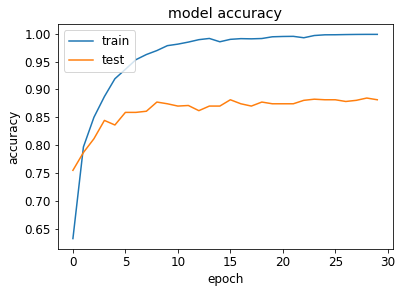

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

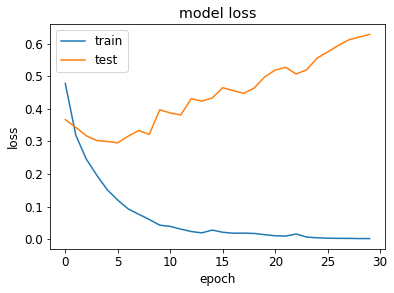

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Constructing Word2Vec embedding layer
embedding_layer = Embedding(embedding_matrix.shape[0], 
                            embedding_matrix.shape[1], 
                            weights=[embedding_matrix])


# Constructing LSTM with Word2Vec embedding
model3 = Sequential()
model3.add(embedding_layer)
model3.add(Dropout(0.1))
model3.add(LSTM(128))
model3.add(Dense(nb_classes))
model3.add(Activation('softmax'))
model3.summary()

# Compiling model
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         585900    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 300)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 805,935
Trainable params: 805,935
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=max_index, verbose=1)


# Model evaluation
score = model3.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/29
273/273 [==============================] - 7s 20ms/step - loss: 0.5570 - accuracy: 0.5348
Epoch 2/29
273/273 [==============================] - 5s 19ms/step - loss: 0.3246 - accuracy: 0.7828
Epoch 3/29
273/273 [==============================] - 5s 19ms/step - loss: 0.2365 - accuracy: 0.8586
Epoch 4/29
273/273 [==============================] - 5s 20ms/step - loss: 0.1828 - accuracy: 0.8997
Epoch 5/29
273/273 [==============================] - 5s 20ms/step - loss: 0.1328 - accuracy: 0.9295
Epoch 6/29
273/273 [==============================] - 5s 19ms/step - loss: 0.0936 - accuracy: 0.9546
Epoch 7/29
273/273 [==============================] - 5s 20ms/step - loss: 0.0762 - accuracy: 0.9637
Epoch 8/29
273/273 [==============================] - 5s 19ms/step - loss: 0.0653 - accuracy: 0.9715
Epoch 9/29
273/273 [==============================] - 5s 19ms/step - loss: 0.0428 - accuracy: 0.9797
Epoch 10/29
273/273 [==============================] - 5s 20ms/step - loss: 0.0387 - accura

In [ ]:
# Evaluate the model on validaton set
y_pred_lstm = model3.predict(X_test_seq, batch_size=batch_size, verbose=1)

y_pred_bool = np.argmax(y_pred_lstm, axis=1)

31/31 [==============================] - 1s 6ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       290
           1       0.92      0.87      0.90       343
           2       0.88      0.87      0.87       337

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970



In [ ]:
# Evaluating on the validaton set
modelEvaluation(y_pred_bool, "LSTM | Word2Vec Embedding")


Accuracy on validation set: 0.8907

F1 score : 0.8906

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       290
           1       0.92      0.87      0.90       343
           2       0.88      0.87      0.87       337

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970


Confusion Matrix : 
 [[273   6  11]
 [ 14 299  30]
 [ 26  19 292]]


**BERT**


Loading Tokenizer and Encoding our Data

In [ ]:
!pip install transformers

In [ ]:
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
print('Length of Tokenizer Vocab is {}'.format(len(tokenizer.vocab)))

Length of Tokenizer Vocab is 30522


In [ ]:

encoded_data_train = tokenizer.batch_encode_plus(
    X_train.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    X_test.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_test.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
len(dataset_train)

8724

In [ ]:
len(dataset_val)

970

**Setting up BERT Pretrained Model**

In [ ]:
from transformers import BertForSequenceClassification

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

**Creating Data Loaders**

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

**Setting Up Optimiser and Scheduler**

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

In [ ]:
epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

**Defining our Performance Metrics**

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
def accuracy_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return accuracy_score(labels_flat, preds_flat)

In [ ]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

**Creating our Training Loop**

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)             
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    val_acc = accuracy_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    tqdm.write(f'Accuracy Score: {val_acc}')


Epoch 1
Training loss: 0.7007190856959794
Validation loss: 0.5136879538336108
F1 Score (Weighted): 0.7993071488877751
Accuracy Score: 0.8020618556701031



Epoch 2
Training loss: 0.4258823480470713
Validation loss: 0.41748653688738424
F1 Score (Weighted): 0.8603173335785713
Accuracy Score: 0.8608247422680413



Epoch 3
Training loss: 0.281333958873382
Validation loss: 0.3697665957433562
F1 Score (Weighted): 0.8813834208888147
Accuracy Score: 0.8814432989690721



Epoch 4
Training loss: 0.1936639023146459
Validation loss: 0.38009708350704563
F1 Score (Weighted): 0.8864588554692899
Accuracy Score: 0.8865979381443299



Epoch 5
Training loss: 0.13019587921026426
Validation loss: 0.40058786896688325
F1 Score (Weighted): 0.9031570986508907
Accuracy Score: 0.9030927835051547



Epoch 6
Training loss: 0.09775525356912405
Validation loss: 0.4010712711230641
F1 Score (Weighted): 0.9032208335022439
Accuracy Score: 0.9030927835051547



Epoch 7
Training loss: 0.07108234951866198
Validation loss: 0.44748372503466183
F1 Score (Weighted): 0.9069671306529585
Accuracy Score: 0.9072164948453608



Epoch 8
Training loss: 0.055146167193788474
Validation loss: 0.4413075214552303
F1 Score (Weighted): 0.9083389204773089
Accuracy Score: 0.9082474226804124



Epoch 9
Training loss: 0.049230338379590614
Validation loss: 0.4715174742703957
F1 Score (Weighted): 0.9144878426412499
Accuracy Score: 0.9144329896907216



Epoch 10
Training loss: 0.03914923411231119
Validation loss: 0.4574110591033053
F1 Score (Weighted): 0.9122244323940577
Accuracy Score: 0.9123711340206185



In [ ]:
uval_loss, predictions, true_vals = evaluate(dataloader_validation)

val_acc_bert = accuracy_score_func(predictions, true_vals)
val_f1_bert = f1_score_func(predictions, true_vals)

model_name_acc.append(["BERT", val_acc_bert, val_f1_bert])

print ("BERT")
print ("Accuracy Score: ",val_acc_bert)
print ("      F1 Score: ",val_f1_bert)

BERT
Accuracy Score:  0.9123711340206185
      F1 Score:  0.9122244323940577


##5 Analysis

***Topic Modelling***

*Latent Dirichlet Allocation(LDA)*

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#Download Stopwords
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

print("Setup Complete")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Setup Complete


In [ ]:
data1.head()

,reviews.text,sentiment
0,This product so far has not disappointed. My c...,Positive
1,great for beginner or experienced person. Boug...,Positive
2,Inexpensive tablet for him to use and learn on...,Positive
3,I've had my Fire HD 8 two weeks now and I love...,Positive
4,I bought this for my grand daughter when she c...,Positive


In [ ]:
data_lda = data1

In [ ]:
data_lda.head()

,reviews.text,sentiment
0,This product so far has not disappointed. My c...,Positive
1,great for beginner or experienced person. Boug...,Positive
2,Inexpensive tablet for him to use and learn on...,Positive
3,I've had my Fire HD 8 two weeks now and I love...,Positive
4,I bought this for my grand daughter when she c...,Positive


In [ ]:
data_lda['Processed_Review'] = data_lda['reviews.text'].apply(preprocess)

data_lda.head()

,reviews.text,sentiment,Processed_Review
0,This product so far has not disappointed. My c...,Positive,product far disappoint child love use like abi...
1,great for beginner or experienced person. Boug...,Positive,great beginner experience person buy gift love
2,Inexpensive tablet for him to use and learn on...,Positive,inexpensive tablet use learn step nabi thrill ...
3,I've had my Fire HD 8 two weeks now and I love...,Positive,fire hd two week love tablet great value prime...
4,I bought this for my grand daughter when she c...,Positive,buy grand daughter come visit set user enter a...


In [ ]:
data_lda1 = data_lda[["sentiment","Processed_Review"]]
data_lda1.head()

,sentiment,Processed_Review
0,Positive,product far disappoint child love use like abi...
1,Positive,great beginner experience person buy gift love
2,Positive,inexpensive tablet use learn step nabi thrill ...
3,Positive,fire hd two week love tablet great value prime...
4,Positive,buy grand daughter come visit set user enter a...


In [ ]:
import nltk
nltk.download('wordnet')

doc_complete = data_lda1["Processed_Review"].tolist()
doc_clean = [cleanText(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import gensim
from gensim import corpora

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(10423 unique tokens: ['ability', 'child', 'content', 'control', 'disappoint']...)


In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(8, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
 [(12, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1)],
 [(2, 1),
  (7, 1),
  (8, 2),
  (17, 1),
  (25, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 2),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1)],
 [(2, 1),
  (8, 1),
  (14, 2),
  (25, 3),
  (28, 1),
  (35, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
 

In [ ]:
from gensim.models import LdaModel

In [ ]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)

In [ ]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.102*"tv" + 0.063*"fire" + 0.044*"amazon" + 0.035*"stream" + 0.029*"watch" + 0.028*"movie" + 0.024*"apps" + 0.020*"show" + 0.019*"use" + 0.017*"prime"')

(1, '0.054*"battery" + 0.028*"one" + 0.026*"buy" + 0.026*"last" + 0.023*"get" + 0.022*"use" + 0.021*"long" + 0.019*"time" + 0.018*"work" + 0.017*"box"')

(2, '0.098*"read" + 0.066*"recommend" + 0.057*"book" + 0.047*"would" + 0.031*"light" + 0.024*"love" + 0.020*"answer" + 0.020*"highly" + 0.020*"kindle" + 0.018*"great"')

(3, '0.031*"echo" + 0.028*"alexa" + 0.026*"music" + 0.021*"amazon" + 0.017*"play" + 0.015*"get" + 0.015*"use" + 0.015*"home" + 0.013*"love" + 0.012*"speaker"')

(4, '0.134*"easy" + 0.125*"use" + 0.043*"great" + 0.036*"set" + 0.022*"love" + 0.015*"setup" + 0.015*"product" + 0.013*"user" + 0.012*"tablet" + 0.012*"size"')

(5, '0.060*"product" + 0.056*"best" + 0.032*"buy" + 0.031*"great" + 0.026*"amazon" + 0.021*"purchase" + 0.017*"device" + 0.017*"good" + 0.015*"service" + 0.015*"roku"')

(6, '0.056*"good" + 0.03

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v', topn=NUM_TOPICS)
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5488407571654116


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model_topic_an = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model_topic_an)
        coherencemodel = CoherenceModel(model=model_topic_an, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=doc_clean, start=2, limit=50, step=1)

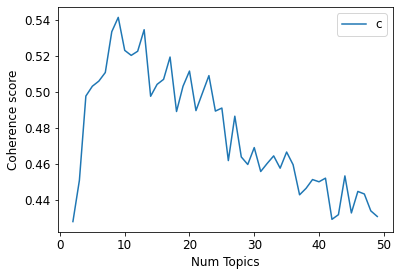

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 10)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [ ]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,tv,battery,read,echo,easy,product,good,kindle,love
1,fire,one,recommend,alexa,use,best,tablet,screen,buy
2,amazon,buy,book,music,great,buy,great,question,tablet
3,stream,last,would,amazon,set,great,price,new,kid
4,watch,get,light,play,love,amazon,stick,one,great
5,movie,use,love,get,setup,purchase,quality,fire,one
6,apps,long,answer,use,product,device,fast,reader,gift
7,show,time,highly,home,user,good,work,much,old
8,use,work,kindle,love,tablet,service,amazon,like,get
9,prime,box,great,speaker,size,roku,fire,paperwhite,year


In [ ]:
ldamodel.show_topic(0, topn = 10)

[('tv', 0.10219153),
 ('fire', 0.06261048),
 ('amazon', 0.04375741),
 ('stream', 0.035030946),
 ('watch', 0.029043209),
 ('movie', 0.028309375),
 ('apps', 0.02417463),
 ('show', 0.020331835),
 ('use', 0.018733637),
 ('prime', 0.016953649)]

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim

***Displaying Results & Getting Insights***

In [ ]:
Lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(Lda_display)

Inference and Observations

In [ ]:
#downloaded3 = drive.CreateFile({'id':'1M2TUqiAEP_bN5YjvrWENOUk01xznL-KT'}) # replace the id with id of file you want to access
#downloaded3.GetContentFile('model_acc1.xlsx') 
#pd.read_excel('model_acc1.xlsx')

In [ ]:
data_acc1 = pd.DataFrame(model_name_acc, columns =['Model_Name', 'Accuracy', 'F1_Score'])
data_acc1

,Model_Name,Accuracy,F1_Score
0,Multinomial Naive Bayes | CountVectorizer,0.741237,0.739932
1,Logistic Regression | CountVectorizer,0.842268,0.842298
2,Decision tree | CountVectorize,0.815464,0.814229
3,Random Forest Classifer | CountVectorizer,0.891753,0.891292
4,XGBoost Classifier | CountVectorizer,0.693814,0.687934
5,Logistic Regression | TfidfVectorizer,0.788660,0.787448
6,Multinomial Naive Bayes | TfidfVectorizer,0.743299,0.739185
7,Decision tree | TfidfVectorizer,0.815464,0.815117
8,Random Forest Classifer | TfidfVectorizer,0.891753,0.891411
9,XGBoost Classifier | TfidfVectorizer,0.730928,0.726596


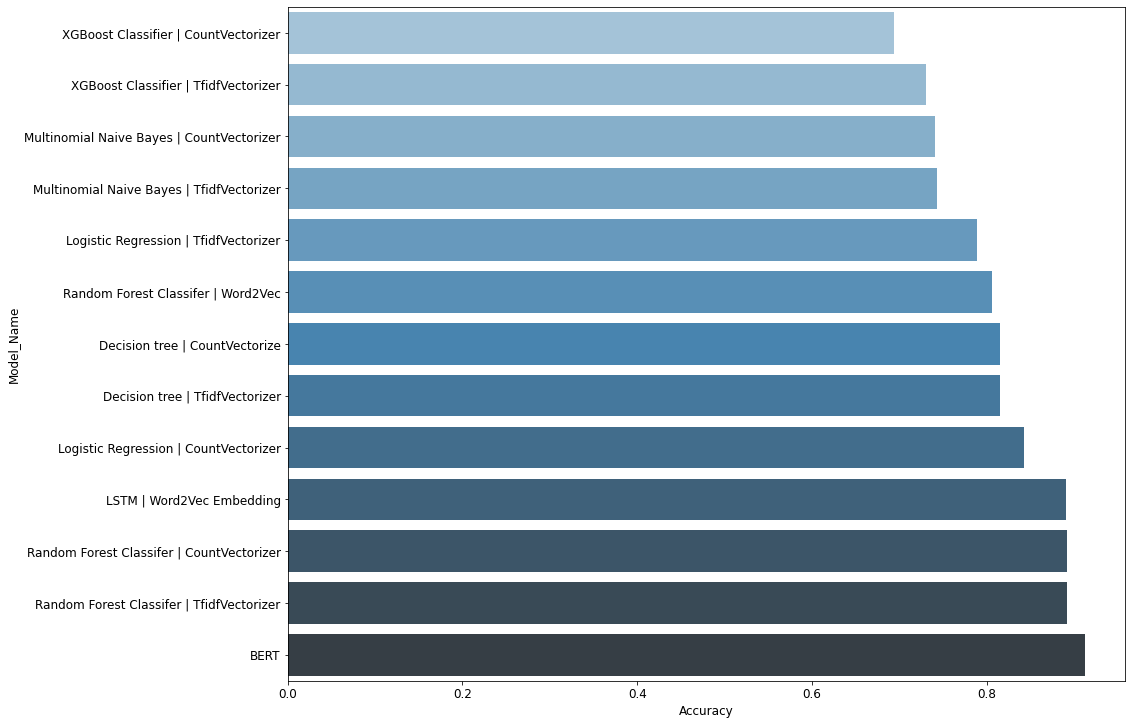

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x="Accuracy", y="Model_Name", data=data_acc1.sort_values(by=['Accuracy']), palette="Blues_d")

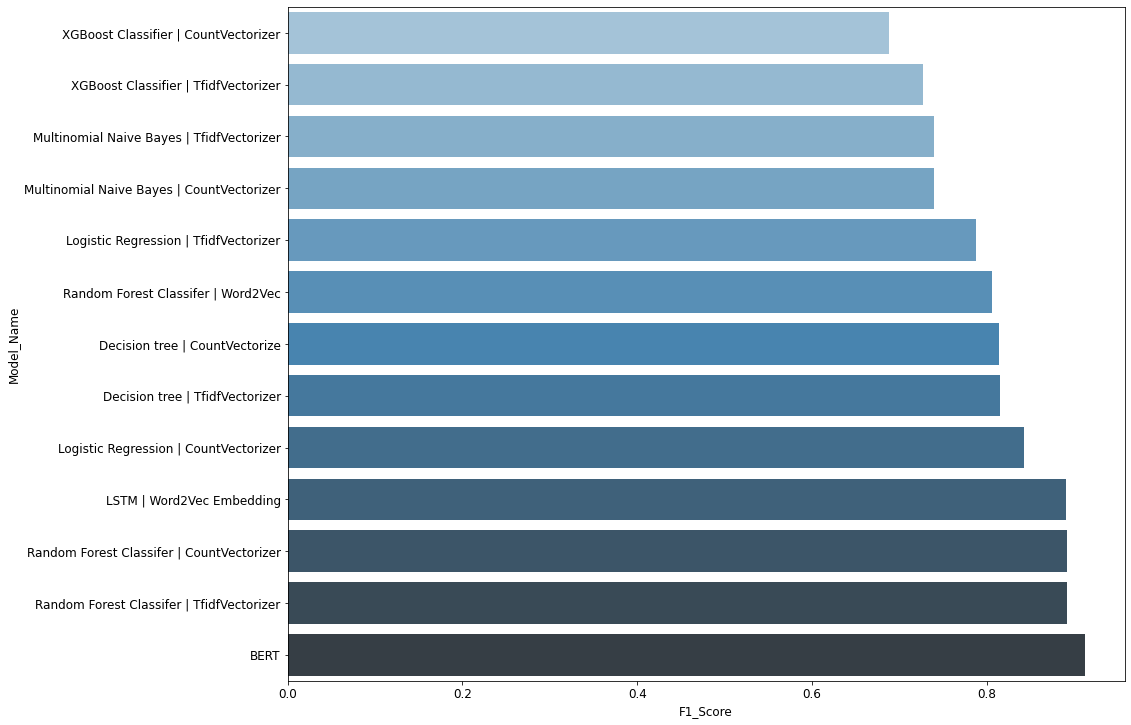

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x="F1_Score", y="Model_Name", data=data_acc1.sort_values(by=['F1_Score']), palette="Blues_d")